In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
start = '2012-01-01'
end = '2024-06-28'
stock = 'TSLA'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2012-01-03,1.872000,1.966667,1.843333,1.929333,13921500
1,2012-01-04,1.847333,1.911333,1.833333,1.880667,9451500
2,2012-01-05,1.808000,1.862000,1.790000,1.850667,15082500
3,2012-01-06,1.794000,1.852667,1.760667,1.813333,14794500
4,2012-01-09,1.816667,1.832667,1.741333,1.800000,13455000
...,...,...,...,...,...,...
3136,2024-06-21,183.009995,183.949997,180.690002,182.300003,63029500
3137,2024-06-24,182.580002,188.800003,182.550003,184.970001,61992100
3138,2024-06-25,187.350006,187.970001,182.009995,184.399994,63678300


In [ ]:
ma_100_days = data.Close.rolling(100).mean()

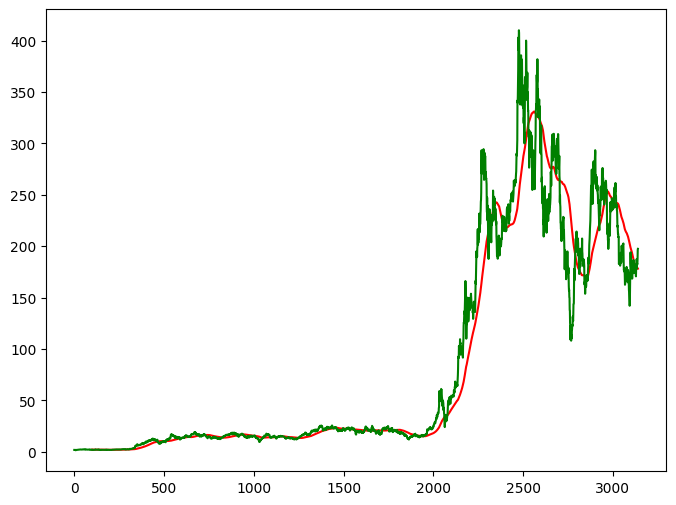

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [ ]:
ma_200_days = data.Close.rolling(200).mean()

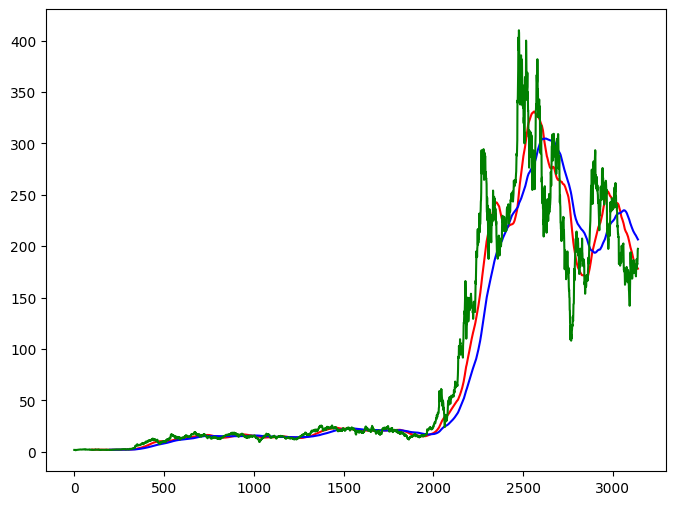

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [ ]:
data_train.shape[0]

2512

In [ ]:
data_test.shape[0]

629

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50


In [ ]:
model.summary()

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test_scale  =  scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

In [ ]:
scale =1/scaler.scale_

In [ ]:
y_predict = y_predict*scale

In [ ]:
y = y*scale

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Predictions Model.keras')